In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import keras
import random
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

2026-02-16 11:30:09.415801: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [1]:
def plot_matriz_confusion(axes,TP=0,TN=0,FP=0,FN=0,fontsize=15,titulo=None,vpp=None,vpn=None,sensibilidad=None,especificidad=None,f1_score=None,mcc=None,auc=None,prevalencia=None):
    success_color=matplotlib.colors.to_rgb('#9EE548')
    failure_color=matplotlib.colors.to_rgb("#C32240")
    blanco_color=matplotlib.colors.to_rgb("#FFFFFF")
 
 
    if ((vpp is not None) | 
        (vpn is not None) | 
        (sensibilidad is not None) |
        (especificidad is not None) | 
        (prevalencia is not None) |
        (f1_score is not None) | 
        (mcc is not None) |
        (auc is not None) ):
        show_metrics=True
    else:
        show_metrics=False
 
 
    if show_metrics==False:
        axes.imshow([[success_color,failure_color],[failure_color,success_color]])
    else:
        axes.imshow([[success_color,failure_color,blanco_color],[failure_color,success_color,blanco_color],[blanco_color,blanco_color,blanco_color]])
 
 
    if titulo==None:
        titulo="Predicción"
    else:
        titulo=titulo+"\nPredicción"
 
    labels = ['Positivo','Negativo']
    xaxis = np.arange(len(labels))
    axes.set_xticks(xaxis)
    axes.set_yticks(xaxis)
    axes.set_xticklabels(labels, fontsize=13, color="#003B80")
    axes.set_yticklabels(labels, fontsize=13, color="#003B80")
    axes.text(0, 0, str(TP)+" TP",ha="center", va="center", color="#0A2102",fontsize=fontsize)
    axes.text(0, 1, str(FP)+" FP",ha="center", va="center", color="#FAEAEA",fontsize=fontsize) 
    axes.text(1, 0, str(FN)+" FN",ha="center", va="center", color="#FAEAEA",fontsize=fontsize)
    axes.text(1, 1, str(TN)+" TN",ha="center", va="center", color="#0A2102",fontsize=fontsize)         
    axes.xaxis.tick_top()
    axes.set_xlabel(titulo, fontsize=fontsize, color="#003B80") 
    axes.xaxis.set_label_position('top') 
    axes.set_ylabel('Realidad', fontsize=fontsize, color="#003B80") 
 
 
    if show_metrics==True:
 
 
        if (vpp is not None):
            axes.text(0, 2, f"Precision\n{vpp:.2f}",ha="center", va="center", color="#0A2102",fontsize=fontsize-4)
        if (vpn is not None):
            axes.text(1, 2, f"VPN\n{vpn:.2f}",ha="center", va="center", color="#0A2102",fontsize=fontsize-4)
        if (sensibilidad is not None):
            axes.text(2, 0, f"Sensibilidad\n{sensibilidad:.2f}",ha="center", va="center", color="#0A2102",fontsize=fontsize-4) 
        if (especificidad is not None):
            axes.text(2, 1, f"Especificidad\n{especificidad:.2f}",ha="center", va="center", color="#0A2102",fontsize=fontsize-4) 
 
        metricas_generales=""
        if (prevalencia is not None):
            metricas_generales=metricas_generales+f"Prevalencia\n{prevalencia:.2f}\n"        
        if (f1_score is not None):
            metricas_generales=metricas_generales+f"F1-score\n{f1_score:.2f}\n"   
        if (mcc is not None):
            metricas_generales=metricas_generales+f"MCC\n{mcc:.2f}\n"  
        if (auc is not None):
            metricas_generales=metricas_generales+f"AUC\n{auc:.2f}"             
 
        axes.text(2, 2, metricas_generales,ha="center", va="center", color="#0A2102",fontsize=fontsize-4)    

## 1. Ejercicio 1

Si una red neuronal para detectar si una radiografía es de un tórax ha predicho lo siguiente:

Para 13 radiografías que eran de tórax , en 8 ha dicho que era un tórax y en 5 ha dicho que no lo era.
Para 7 radiografías que no eran un tórax , en 4 ha dicho que no era un tórax y en 3 ha dicho que lo era.
Indica el nº de:

Verdaderos Positivos (TP)
Verdaderos Negativos (TN)
Falsos Positivos (FP)
Falsos Negativos (FN)
Dibuja la matriz de confusión

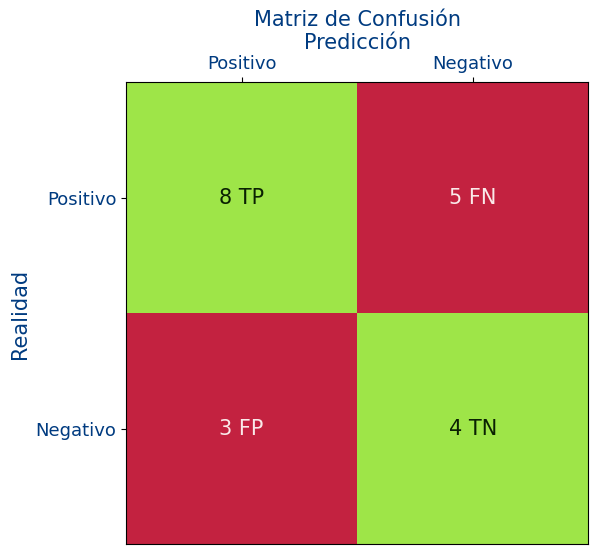

In [8]:
TP = 8
TN = 4
FP = 3
FN = 5

fig, axes = plt.subplots(1, 1, figsize=(6, 6))
plot_matriz_confusion(
    axes, TP=TP, TN=TN, FP=FP, FN=FN, fontsize=15, titulo="Matriz de Confusión"
)
plt.show()

## 2. Ejercicio 2.a

Seguimos con la red neuronal que predice si una radiografía es de tórax.

Si para 10 imágenes ha sacado los siguientes resultados:


1
y_score=np.array([0.27, 0.45,  0.76,  0.55,  0.28, 0.04, 0.34,0.4, 0.66, 0.88, 0.94,0.47,0.2])
Indica para cada valor predicho , si ha predicho que era una imagen de tórax o no.

In [11]:
y_score=np.array([0.27, 0.45,  0.76,  0.55,  0.28, 0.04, 0.34,0.4, 0.66, 0.88, 0.94,0.47,0.2])
y_pred=np.where(y_score>=0.5,1,0)

# Indica para cada valor predicho , si ha predicho que era una imagen de tórax o no.
for i in range(len(y_score)):
    print(f"Valor predicho: {y_score[i]:.2f} - Predicción: {'Tórax' if y_pred[i]==1 else 'No tórax'}")

Valor predicho: 0.27 - Predicción: No tórax
Valor predicho: 0.45 - Predicción: No tórax
Valor predicho: 0.76 - Predicción: Tórax
Valor predicho: 0.55 - Predicción: Tórax
Valor predicho: 0.28 - Predicción: No tórax
Valor predicho: 0.04 - Predicción: No tórax
Valor predicho: 0.34 - Predicción: No tórax
Valor predicho: 0.40 - Predicción: No tórax
Valor predicho: 0.66 - Predicción: Tórax
Valor predicho: 0.88 - Predicción: Tórax
Valor predicho: 0.94 - Predicción: Tórax
Valor predicho: 0.47 - Predicción: No tórax
Valor predicho: 0.20 - Predicción: No tórax


## 3. Ejercicio 2.b

Seguimos con la red neuronal que predice si una radiografía es de tórax.

Si para 10 imágenes ha sacado los siguientes resultados:


1
y_score=np.array([0.27, 0.45,  0.76,  0.55,  0.28, 0.04, 0.34,0.4, 0.66, 0.88, 0.94,0.47,0.2])
Pero los valores verdaderos son los siguientes:

1
y_true=np.array([1,0,1,0,0,0,1,0,1,1,1,1,0])
Indica el nº de:

Verdaderos Positivos (TP)
Verdaderos Negativos (TN)
Falsos Positivos (FP)
Falsos Negativos (FN)
Dibuja la matriz de confusión

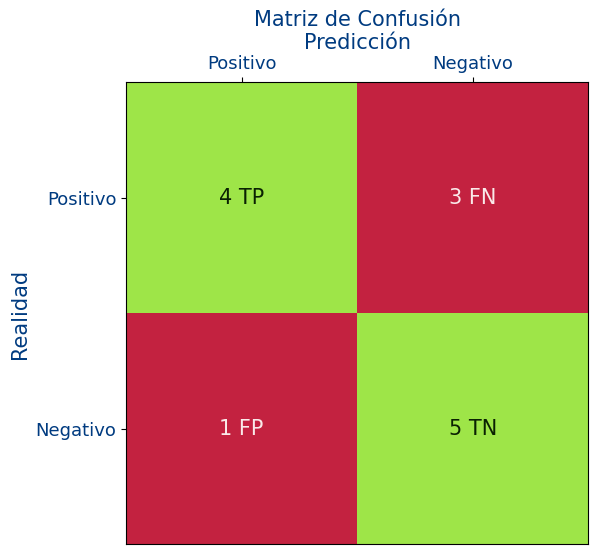

In [14]:
y_score=np.array([0.27, 0.45,  0.76,  0.55,  0.28, 0.04, 0.34,0.4, 0.66, 0.88, 0.94,0.47,0.2])

y_true=np.array([1,0,1,0,0,0,1,0,1,1,1,1,0])

y_pred=np.where(y_score>=0.5,1,0)

TP = sum((y_pred == 1) & (y_true == 1))
TN = sum((y_pred == 0) & (y_true == 0))
FP = sum((y_pred == 1) & (y_true == 0))
FN = sum((y_pred == 0) & (y_true == 1))

fig, axes = plt.subplots(1, 1, figsize=(6, 6))
plot_matriz_confusion(
    axes, TP=TP, TN=TN, FP=FP, FN=FN, fontsize=15, titulo="Matriz de Confusión"
)
plt.show()

## 4. Ejercicio 2.C

Siguiendo con los datos anteriores y suponiendo que el umbral es 0.5:


1
2
y_true=np.array([1,0,1,0,0,0,1,0,1,1,1,1,0])
y_score=np.array([0.27, 0.45,  0.76,  0.55,  0.28, 0.04, 0.34,0.4, 0.66, 0.88, 0.94,0.47,0.2])
Calcula directamente las siguientes métricas:

Prevalencia
Sensibilidad
Especificidad
VPP
VPN

In [15]:
y_true=np.array([1,0,1,0,0,0,1,0,1,1,1,1,0])

y_score=np.array([0.27, 0.45,  0.76,  0.55,  0.28, 0.04, 0.34,0.4, 0.66, 0.88, 0.94,0.47,0.2])

y_pred=np.where(y_score>=0.5,1,0)

TP = sum((y_pred == 1) & (y_true == 1))
TN = sum((y_pred == 0) & (y_true == 0))
FP = sum((y_pred == 1) & (y_true == 0))
FN = sum((y_pred == 0) & (y_true == 1))

prevalencia = (TP + FN) / len(y_true)
sensibilidad = TP / (TP + FN) if (TP + FN) > 0 else 0
especificidad = TN / (TN + FP) if (TN + FP) > 0 else 0
vpp = TP / (TP + FP) if (TP + FP) > 0 else 0    
vpn = TN / (TN + FN) if (TN + FN) > 0 else 0

print(f"Prevalencia: {prevalencia:.2f}")
print(f"Sensibilidad: {sensibilidad:.2f}")
print(f"Especificidad: {especificidad:.2f}")
print(f"VPP: {vpp:.2f}")
print(f"VPN: {vpn:.2f}")

Prevalencia: 0.54
Sensibilidad: 0.57
Especificidad: 0.83
VPP: 0.80
VPN: 0.62


## 5. Ejercicio 3.a.

Crea una red neuronal con los datos de bread cancer con las siguientes características:

neuronas por capa:[30,60,120,200,120,60,30,15,1]
Función de activation: swish
Nº de epocas: 30
Optimizador: Adam con tasa de aprendizaje de 0.00001
Muestra las siguientes métricas durante el entrenamiento y validación (para cada una de las épocas):

Loss
Sensibilidad
Especificidad

In [19]:
# Crea una red neuronal con los datos de bread cancer con las siguientes características:

# neuronas por capa:[30,60,120,200,120,60,30,15,1]
# Función de activation: swish
# Nº de epocas: 30
# Optimizador: Adam con tasa de aprendizaje de 0.00001
# Muestra las siguientes métricas durante el entrenamiento y validación (para cada una de las épocas):

# Loss
# Sensibilidad
# Especificidad

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

# Cargar el dataset de cáncer de mama
data = load_breast_cancer()
X = data.data
y = data.target

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(30, activation='swish', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(60, activation='swish'))
model.add(Dense(120, activation='swish'))
model.add(Dense(200, activation='swish'))
model.add(Dense(120, activation='swish'))
model.add(Dense(60, activation='swish'))
model.add(Dense(30, activation='swish'))
model.add(Dense(15, activation='swish'))
model.add(Dense(1, activation='sigmoid'))

def sensibilidad(y_true, y_pred):
	y_true = tf.cast(y_true, tf.float32)
	y_pred_bin = tf.round(y_pred)
	tp = tf.reduce_sum(tf.cast(y_true * y_pred_bin, tf.float32))
	fn = tf.reduce_sum(tf.cast(y_true * (1 - y_pred_bin), tf.float32))
	return tp / (tp + fn + tf.keras.backend.epsilon())

def especificidad(y_true, y_pred):
	y_true = tf.cast(y_true, tf.float32)
	y_pred_bin = tf.round(y_pred)
	tn = tf.reduce_sum(tf.cast((1 - y_true) * (1 - y_pred_bin), tf.float32))
	fp = tf.reduce_sum(tf.cast((1 - y_true) * y_pred_bin, tf.float32))
	return tn / (tn + fp + tf.keras.backend.epsilon())

# Compilar el modelo
optimizer = Adam(learning_rate=0.00001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[sensibilidad, especificidad])

# Entrenar el modelo y mostrar métricas por época
model.fit(X_train_scaled, y_train, epochs=30, validation_data=(X_test_scaled, y_test), verbose=1)


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - especificidad: 0.4529 - loss: 0.6941 - sensibilidad: 0.5435 - val_especificidad: 0.2526 - val_loss: 0.6939 - val_sensibilidad: 0.7474
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - especificidad: 0.2184 - loss: 0.6935 - sensibilidad: 0.7816 - val_especificidad: 0.1155 - val_loss: 0.6933 - val_sensibilidad: 0.8845
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - especificidad: 0.1012 - loss: 0.6930 - sensibilidad: 0.8988 - val_especificidad: 0.0373 - val_loss: 0.6927 - val_sensibilidad: 0.9627
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - especificidad: 0.0734 - loss: 0.6925 - sensibilidad: 0.9266 - val_especificidad: 0.0373 - val_loss: 0.6922 - val_sensibilidad: 0.9627
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - especificidad: 0.0577 - loss: 0.6919 - sensibilidad: 0.9423 - val_especificidad: 0.0885 - val_loss: 0.6916 - val_sensibilidad: 0.9115
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - especificidad: 0.0773 - loss